In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV files using file paths
students_file_path = 'C:\\Users\\ishar\\Downloads\\students_data.csv'
courses_file_path = 'C:\\Users\\ishar\\Downloads\\courses_data.csv'
faculty_file_path = 'C:\\Users\\ishar\\Downloads\\faculty_data.csv'
grades_file_path = 'C:\\Users\\ishar\\Downloads\\grades_data.csv'

In [7]:
# Load the CSV files into DataFrames
students_df = pd.read_csv(students_file_path)
courses_df = pd.read_csv(courses_file_path)
faculty_df = pd.read_csv(faculty_file_path)
grades_df = pd.read_csv(grades_file_path)


In [9]:
# Verify data
print(students_df.head())
print(courses_df.head())
print(faculty_df.head())
print(grades_df.head())

  Student ID       Name  Age  Enrollment Year             Major   GPA  \
0      S0001  Student 1   22             2020       Mathematics  2.89   
1      S0002  Student 2   25             2021  Computer Science  2.63   
2      S0003  Student 3   23             2022           Biology  2.23   
3      S0004  Student 4   24             2020           Physics  2.01   
4      S0005  Student 5   22             2019         Chemistry  2.06   

                  Email  
0  student1@college.edu  
1  student2@college.edu  
2  student3@college.edu  
3  student4@college.edu  
4  student5@college.edu  
  Course ID      Course Name        Department  Credits Faculty ID
0      C001  Data Structures  Computer Science        3       F001
1      C002       Algorithms           Physics        4       F002
2      C003   Linear Algebra           Biology        4       F003
3      C004      Physics 101           Physics        3       F004
4      C005      Biology 101           Physics        4       F005
  F

In [11]:
# Check basic information of datasets
print(students_df.info())
print(courses_df.info())
print(faculty_df.info())
print(grades_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Student ID       500 non-null    object 
 1   Name             500 non-null    object 
 2   Age              500 non-null    int64  
 3   Enrollment Year  500 non-null    int64  
 4   Major            500 non-null    object 
 5   GPA              500 non-null    float64
 6   Email            500 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 27.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Course ID    10 non-null     object
 1   Course Name  10 non-null     object
 2   Department   10 non-null     object
 3   Credits      10 non-null     int64 
 4   Faculty ID   10 non-null     object
dtypes: int64(1), object(4

In [13]:
# Check for missing values
print(students_df.isnull().sum())
print(courses_df.isnull().sum())
print(faculty_df.isnull().sum())
print(grades_df.isnull().sum())

Student ID         0
Name               0
Age                0
Enrollment Year    0
Major              0
GPA                0
Email              0
dtype: int64
Course ID      0
Course Name    0
Department     0
Credits        0
Faculty ID     0
dtype: int64
Faculty ID      0
Faculty Name    0
Department      0
Email           0
dtype: int64
Student ID    0
Course ID     0
Grade         0
dtype: int64


In [15]:
# Merging grades with students and courses data
grades_students_df = pd.merge(grades_df, students_df, on='Student ID', how='left')
grades_courses_df = pd.merge(grades_students_df, courses_df, on='Course ID', how='left')


In [17]:
# Verify the merged DataFrame
print(grades_courses_df.head())

  Student ID Course ID Grade       Name  Age  Enrollment Year  \
0      S0001      C009    B+  Student 1   22             2020   
1      S0002      C003     D  Student 2   25             2021   
2      S0003      C008     C  Student 3   23             2022   
3      S0004      C006     B  Student 4   24             2020   
4      S0005      C008     B  Student 5   22             2019   

              Major   GPA                 Email        Course Name  \
0       Mathematics  2.89  student1@college.edu         Statistics   
1  Computer Science  2.63  student2@college.edu     Linear Algebra   
2           Biology  2.23  student3@college.edu    AI Introduction   
3           Physics  2.01  student4@college.edu  Organic Chemistry   
4         Chemistry  2.06  student5@college.edu    AI Introduction   

    Department  Credits Faculty ID  
0      Biology        3       F009  
1      Biology        4       F003  
2      Physics        4       F008  
3  Mathematics        4       F006  
4  

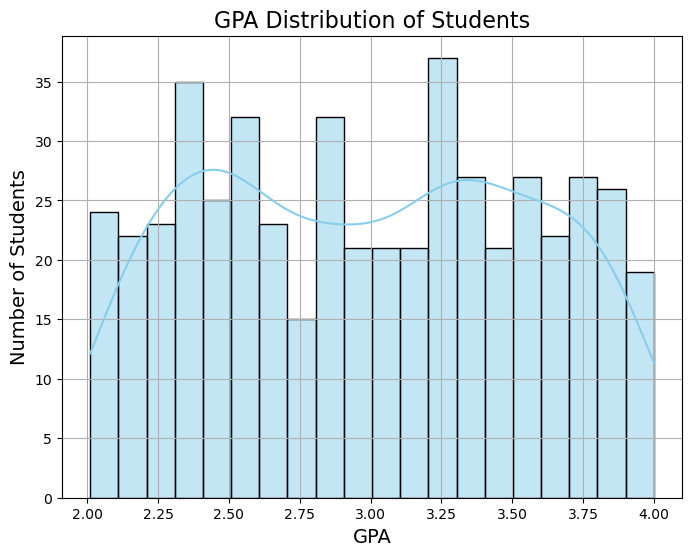

In [19]:
# GPA distribution
plt.figure(figsize=(8, 6))
sns.histplot(students_df['GPA'], bins=20, kde=True, color='skyblue')
plt.title('GPA Distribution of Students', fontsize=16)
plt.xlabel('GPA', fontsize=14)
plt.ylabel('Number of Students', fontsize=14)
plt.grid(True)
plt.show()


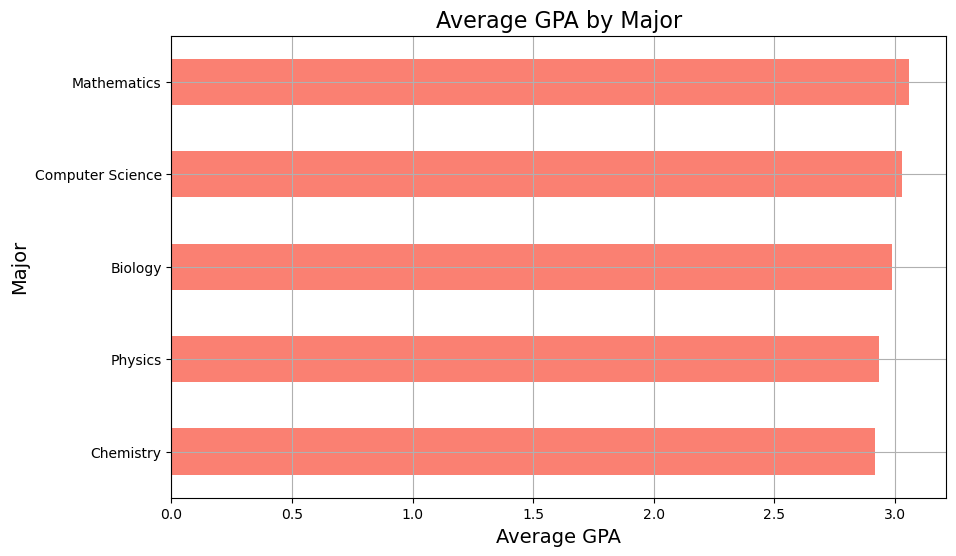

In [21]:
# Avg GPA by major
avg_gpa_by_major = students_df.groupby('Major')['GPA'].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_gpa_by_major.plot(kind='barh', color='salmon')
plt.title('Average GPA by Major', fontsize=16)
plt.xlabel('Average GPA', fontsize=14)
plt.ylabel('Major', fontsize=14)
plt.grid(True)
plt.show()


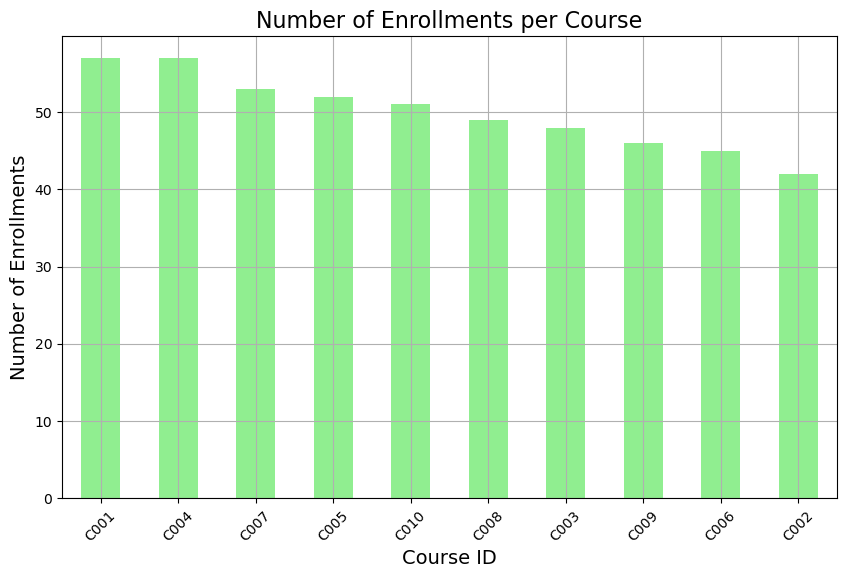

In [23]:
# Course enrollments count
course_enrollments_count = grades_df['Course ID'].value_counts()

plt.figure(figsize=(10, 6))
course_enrollments_count.plot(kind='bar', color='lightgreen')
plt.title('Number of Enrollments per Course', fontsize=16)
plt.xlabel('Course ID', fontsize=14)
plt.ylabel('Number of Enrollments', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


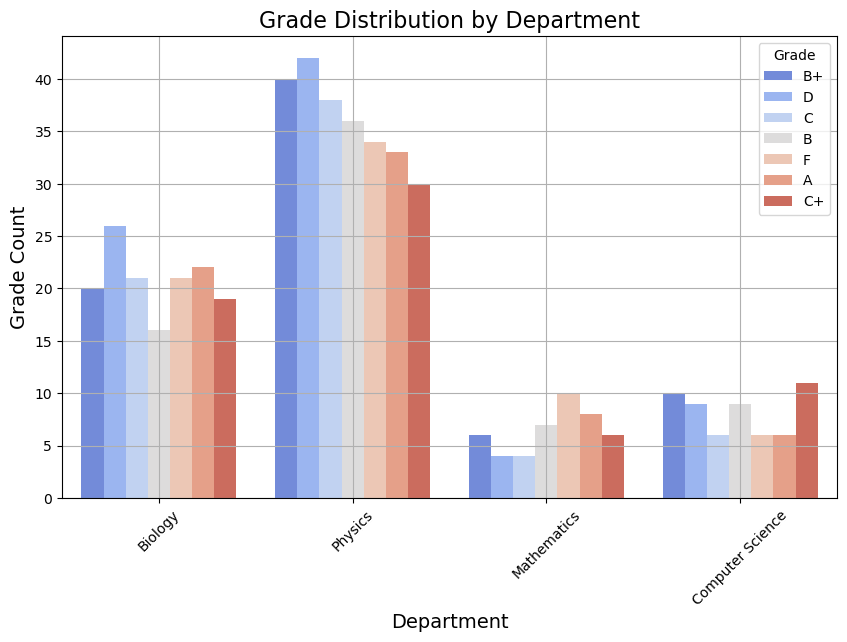

In [25]:
# Plotting grade distribution by department
plt.figure(figsize=(10, 6))
sns.countplot(data=grades_courses_df, x='Department', hue='Grade', palette='coolwarm')
plt.title('Grade Distribution by Department', fontsize=16)
plt.xlabel('Department', fontsize=14)
plt.ylabel('Grade Count', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
